# Car Price Prediction Multiple Linear Regression

### https://www.kaggle.com/hellbuoy/car-price-prediction 

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [280]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [289]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Load the data

In [5]:
raw_df = pd.read_csv('./CarPrice_Assignment.csv')

In [20]:
data_dic = pd.read_excel('./Data Dictionary - carprices.xlsx',header=None)

In [30]:
data_dic = data_dic[[7,11]].dropna()
data_dic = data_dic.rename(columns={7: "column_id", 11: "column_desc"})

In [38]:
data_dic

,column_id,column_desc
4,Car_ID,Unique id of each observation (Interger)
5,Symboling,"Its assigned insurance risk rating, A value of..."
6,carCompany,Name of car company (Categorical)
7,fueltype,Car fuel type i.e gas or diesel (Categorical)
8,aspiration,Aspiration used in a car (Categorical)
9,doornumber,Number of doors in a car (Categorical)
10,carbody,body of car (Categorical)
11,drivewheel,type of drive wheel (Categorical)
12,enginelocation,Location of car engine (Categorical)
13,wheelbase,Weelbase of car (Numeric)


## Data Analysis

In [39]:
df = raw_df.copy()

In [40]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data Visualization

In [57]:
df.columns.values

array(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'], dtype=object)

### Price vs Horse Power

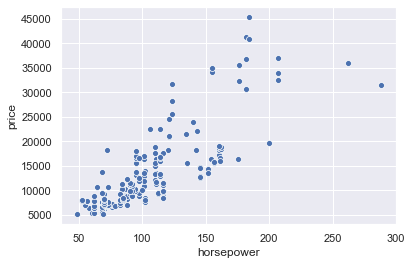

In [50]:
sns.scatterplot(df['horsepower'],df['price'])

<function matplotlib.pyplot.show(*args, **kw)>

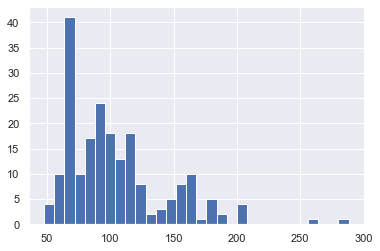

In [49]:
plt.hist(df['horsepower'],bins=30)
plt.show

### Price vs Fuel Type

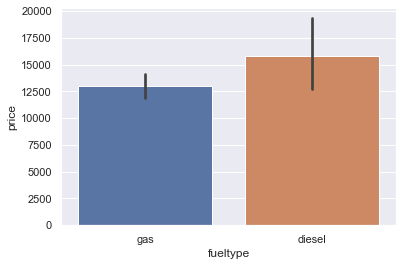

In [54]:
sns.barplot(df['fueltype'],df['price'])

### Price vs No. of Doors

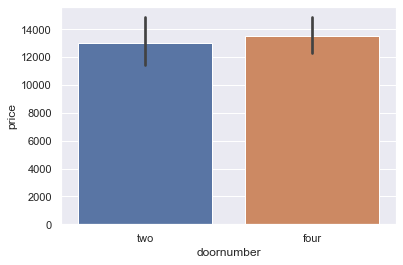

In [66]:
sns.barplot(df['doornumber'],df['price'])

### Price vs Symboling

In [79]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [78]:
data_dic.iloc[1]['column_desc']

'Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) '

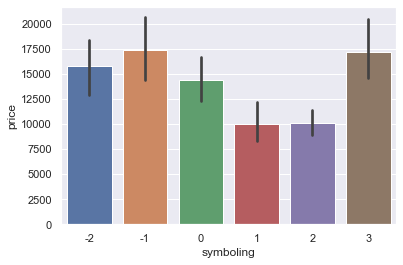

In [81]:
sns.barplot(df['symboling'],df['price'])

### Price vs Aspiration

In [84]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

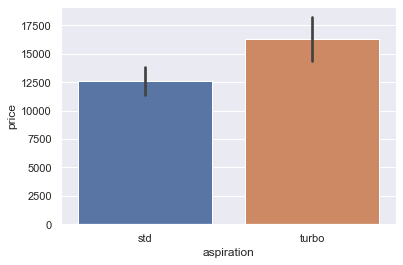

In [89]:
sns.barplot(df['aspiration'],df['price'])

### Price vs Car Body

In [91]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

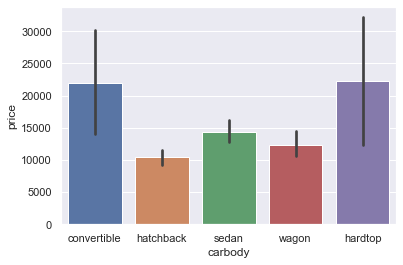

In [92]:
sns.barplot(df['carbody'],df['price'])

### Price vs Height / Width / Length

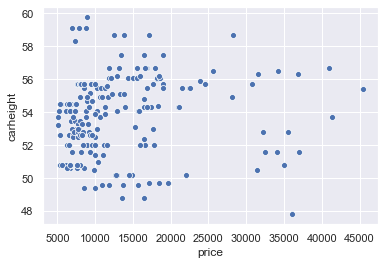

In [97]:
sns.scatterplot(df['price'],df['carheight'])

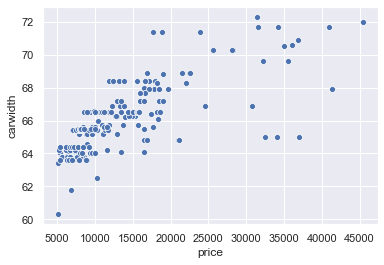

In [98]:
sns.scatterplot(df['price'],df['carwidth'])

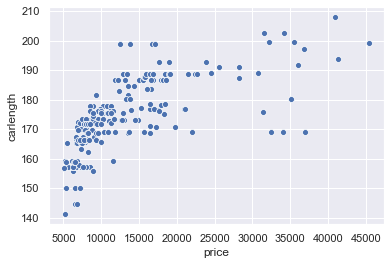

In [99]:
sns.scatterplot(df['price'],df['carlength'])

### Price vs Fuel System

In [101]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

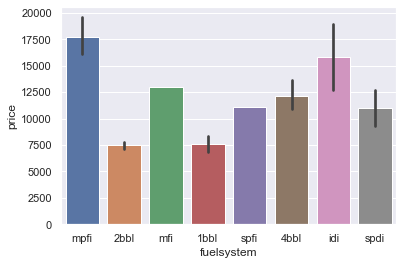

In [102]:
sns.barplot(df['fuelsystem'],df['price'])

### Compression Ratio & Bore Ratio

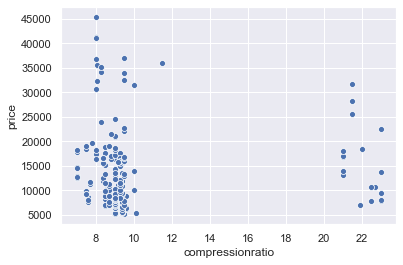

In [104]:
sns.scatterplot(df['compressionratio'],df['price'])

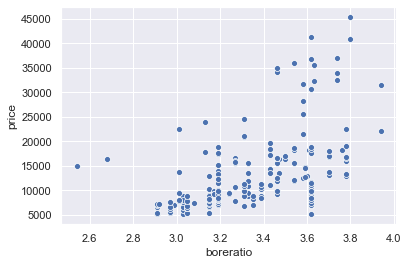

In [108]:
sns.scatterplot(df['boreratio'],df['price'])

### Price vs Highwaympg / citympg

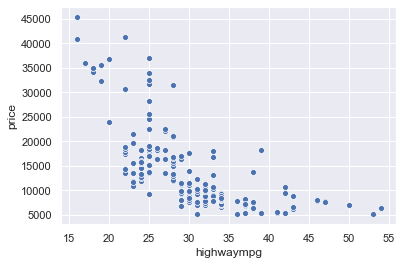

In [110]:
sns.scatterplot(df['highwaympg'],df['price'])

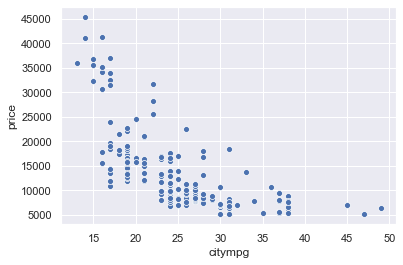

In [111]:
sns.scatterplot(df['citympg'],df['price'])

### Price vs Engine Type

In [114]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

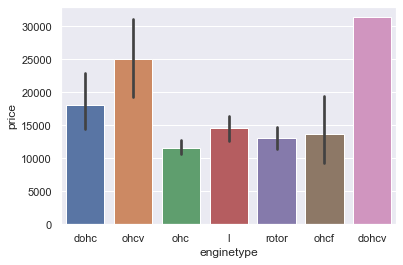

In [116]:
sns.barplot(df['enginetype'],df['price'])

### Price vs Drive Wheels

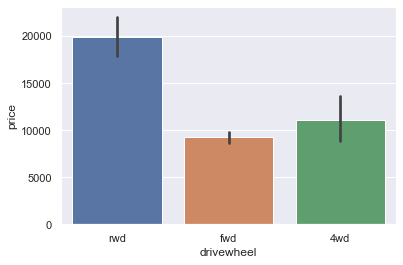

In [117]:
sns.barplot(df['drivewheel'],df['price'])

### Price vs Wheel Base & Engine Size

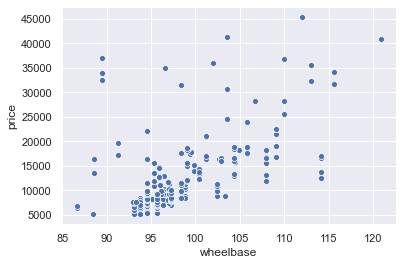

In [121]:
sns.scatterplot(df['wheelbase'],df['price'])

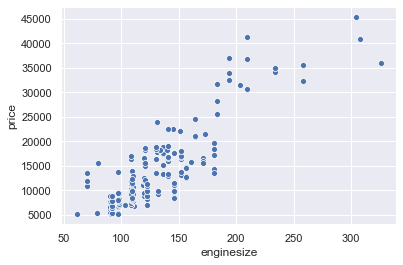

In [122]:
sns.scatterplot(df['enginesize'],df['price'])

### Price vs Engine Location

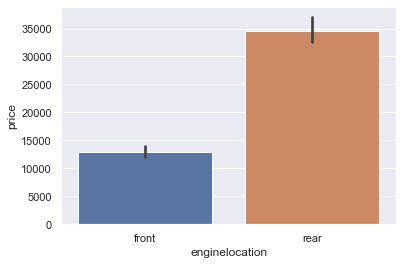

In [140]:
sns.barplot(df['enginelocation'],df['price'])

### Price vs Cylinder Number

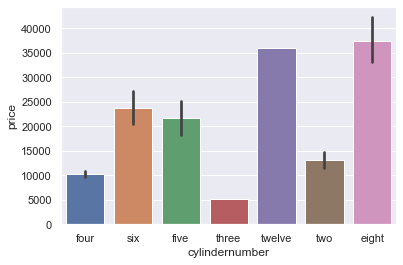

In [142]:
sns.barplot(df['cylindernumber'],df['price'])

## Feature Engineering

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

### Removing unnecessary columns

In [147]:
df.drop(['car_ID','CarName'],axis=1,inplace=True)

### Removing Outliers 

#### Wheelbase

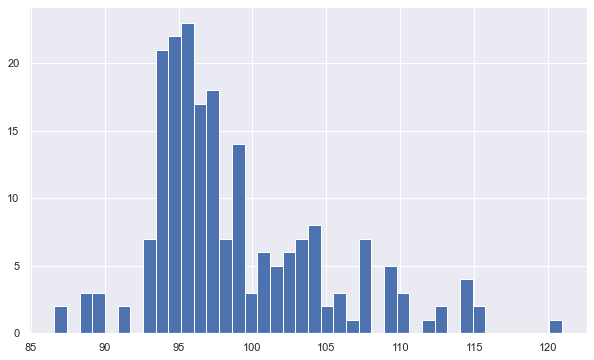

In [186]:
plt.figure(figsize=(10,6))
plt.hist(df['wheelbase'],bins=40)
plt.show()

In [190]:
min_thres, max_thres = df['wheelbase'].quantile([0.005,0.995])

In [196]:
df.shape

(205, 24)

In [203]:
df = df[(df['wheelbase'] > min_thres) & (df['wheelbase'] < max_thres)]

#### Car Width

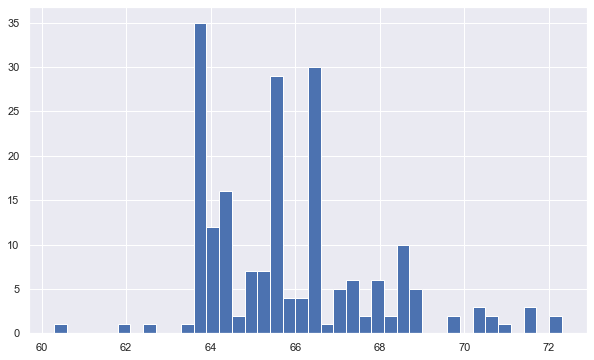

In [208]:
plt.figure(figsize=(10,6))
plt.hist(df['carwidth'],bins=40)
plt.show()

In [213]:
df['carwidth'].quantile([0.05,0.95])

0.05    63.6
0.95    70.3
Name: carwidth, dtype: float64

In [214]:
min_thres, max_thres = df['carwidth'].quantile([0.05,0.95])

In [222]:
df = df[(df['carwidth'] > min_thres) & (df['carwidth'] < max_thres)]

#### Bore Ratio

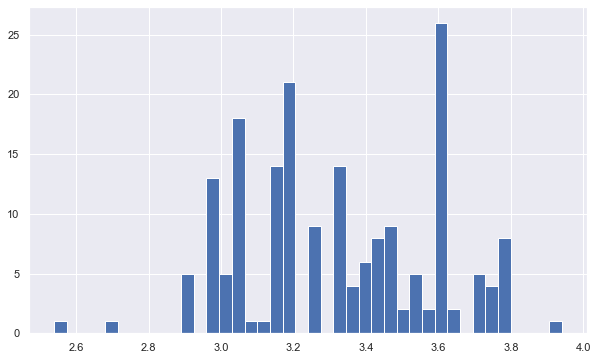

In [226]:
plt.figure(figsize=(10,6))
plt.hist(df['boreratio'],bins=40)
plt.show()

In [236]:
min_thres, max_thres = df['boreratio'].quantile([0.05,0.99])

In [238]:
df = df[(df['boreratio'] > min_thres) & (df['boreratio'] < max_thres)]

#### Compression Ratio

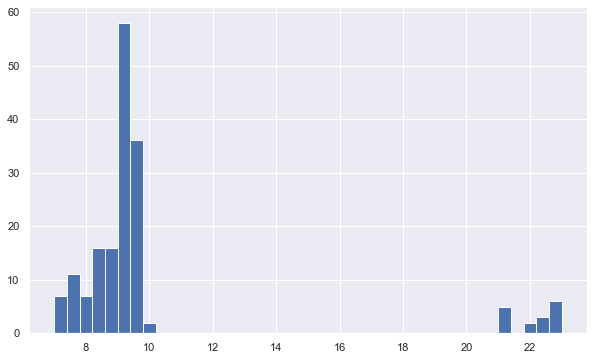

In [240]:
plt.figure(figsize=(10,6))
plt.hist(df['compressionratio'],bins=40)
plt.show()

In [245]:
df = df[df['compressionratio']<20]

#### Stroke

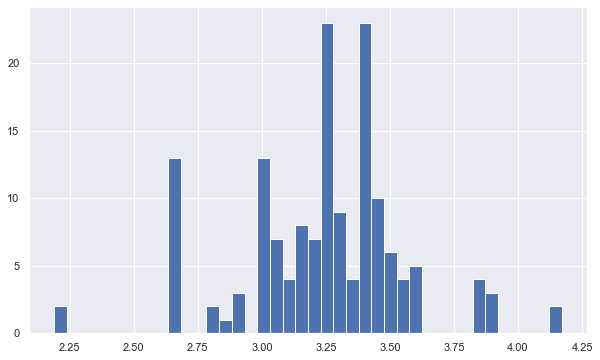

In [247]:
plt.figure(figsize=(10,6))
plt.hist(df['stroke'],bins=40)
plt.show()

In [254]:
df = df[df['stroke']>2.50]

In [256]:
df = df[df['stroke']<3.75]

In [258]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


In [267]:
df.drop('fueltype',axis=1,inplace=True)

In [272]:
df = pd.get_dummies(df,drop_first=True)

## Train Test Split

In [275]:
X = df.drop('price',axis=1)
y = df['price']

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [279]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Model Training

In [281]:
model = LinearRegression()

In [282]:
model.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [286]:
y_hat = model.predict(X_test)

In [290]:
mean_absolute_error(y_test,y_hat)

1879.5115358892342

In [292]:
np.sqrt(mean_squared_error(y_test,y_hat))

2653.514590677609

In [322]:
y_actual = np.array(y_test)

In [346]:
eval_df = pd.DataFrame(y_actual,columns=['Actual Price'])
eval_df['Predicted Price'] = y_hat
eval_df.head(10)

,Actual Price,Predicted Price
0,8495.0,10884.026879
1,10945.0,11845.000000
2,6649.0,6702.862171
3,8499.0,7985.409734
4,15690.0,22458.344454
5,11549.0,12688.427934
6,6229.0,6376.019073
7,16925.0,16310.091861
8,7689.0,7488.928901
9,7738.0,8418.232858


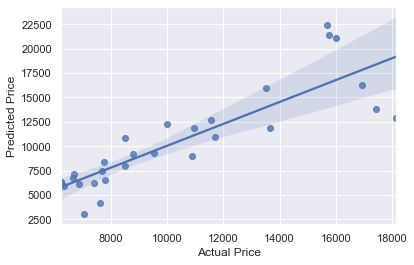

In [342]:
sns.regplot(eval_df['Actual Price'],eval_df['Predicted Price'])

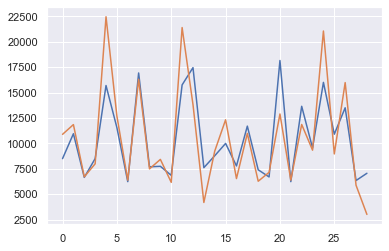

In [344]:
plt.plot(eval_df['Actual Price'])
plt.plot(eval_df['Predicted Price'])

## Model Saving

In [347]:
import joblib

In [348]:
joblib.dump(model,'car_price_reg_model')

['car_price_reg_model']

In [349]:
joblib.dump(scaler,'car_price_scaler.pkl')

['car_price_scaler.pkl']